In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
numeric_col = df.drop(columns=["species"])
numeric_col

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Dağılım Grafikleri

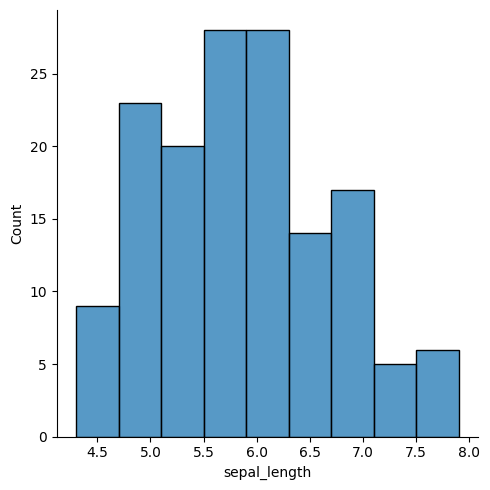

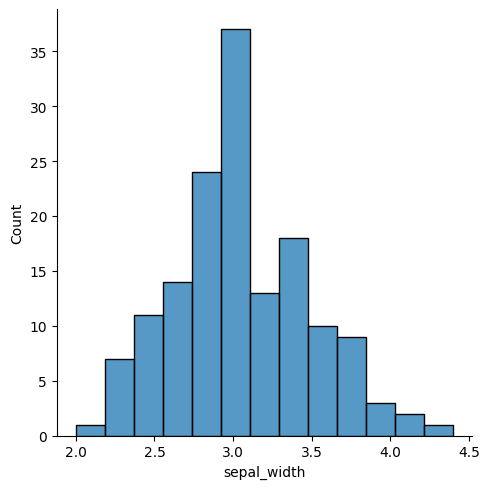

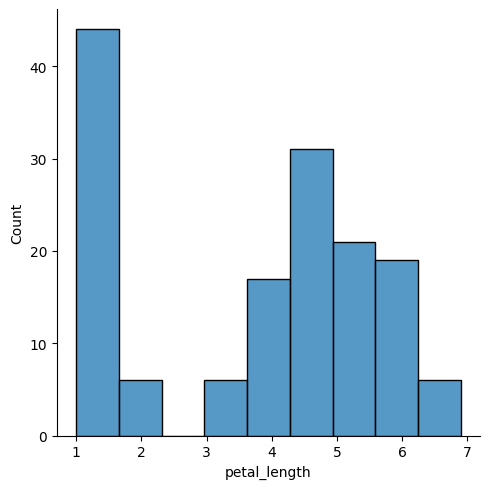

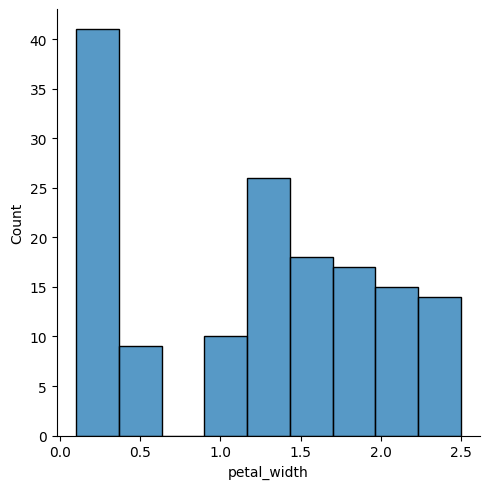

In [8]:
for col in numeric_col.columns:
    sns.displot(df[col]);
plt.show()

# Shapiro-Wilk Testi

In [22]:
from scipy.stats import shapiro, normaltest, anderson

In [27]:
for col in numeric_col.columns:
    data = numeric_col[col]

    stats, p_value = shapiro(df[col])

    alpha = 0.05
    if p_value > alpha:
        print(f"{col} için normallik testi p_value: {round(p_value, 10)} değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.\n")
    else:
        print(f"{col} için normallik testi p_value: {round(p_value, 10)} değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.\n")

sepal_length için normallik testi p_value: 0.0101811615 değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

sepal_width için normallik testi p_value: 0.1011542692 değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

petal_length için normallik testi p_value: 7e-10 değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

petal_width için normallik testi p_value: 1.68e-08 değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.



# D'Agostino's K^2 Normality Test

In [28]:
for col in numeric_col.columns:
    data = numeric_col[col]

    stats, p_value = normaltest(df[col])

    alpha = 0.05
    if p_value > alpha:
        print(f"{col} için normallik testi p_value: {round(p_value, 10)} değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.\n")
    else:
        print(f"{col} için normallik testi p_value: {round(p_value, 10)} değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.\n")

sepal_length için normallik testi p_value: 0.0568242494 değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

sepal_width için normallik testi p_value: 0.2097338099 değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

petal_length için normallik testi p_value: 0.0 değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

petal_width için normallik testi p_value: 0.0 değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.



# Anderson Darling Testi

In [35]:
for col in numeric_col.columns:
    data = df[col]
    result = anderson(data)

    print(f"\n{col} için Statistic: {result.statistic}")
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


sepal_length için Statistic: 0.8891994860134105
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.640, data does not look normal (reject H0)
5.000: 0.767, data does not look normal (reject H0)
2.500: 0.895, data looks normal (fail to reject H0)
1.000: 1.065, data looks normal (fail to reject H0)

sepal_width için Statistic: 0.9079550471145126
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.640, data does not look normal (reject H0)
5.000: 0.767, data does not look normal (reject H0)
2.500: 0.895, data does not look normal (reject H0)
1.000: 1.065, data looks normal (fail to reject H0)

petal_length için Statistic: 7.6785455198266845
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.640, data does not look normal (reject H0)
5.000: 0.767, data does not look normal (reject H0)
2.500: 0.895, data does not look normal (reject H0)
1.000: 1.065, data does not look normal (reject H0)

petal_width için Statistic: 5.1056620354169695
15.000: 0.562, data 